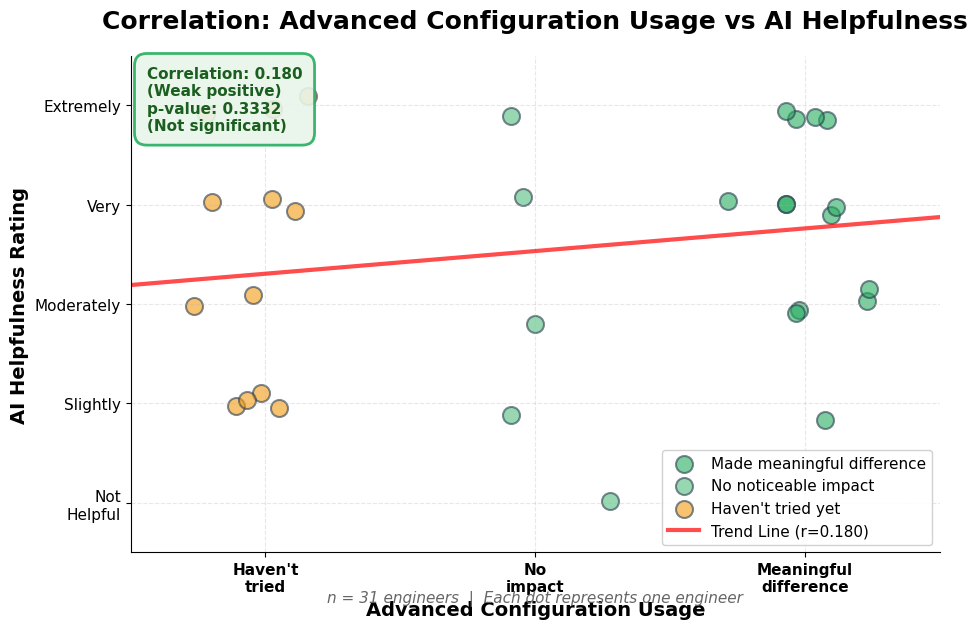


SCATTERPLOT ANALYSIS: ADVANCED CONFIG vs AI HELPFULNESS

📊 Sample Size: 31 engineers

📈 Correlation Analysis:
   • Pearson Correlation Coefficient: 0.1798
   • Correlation Strength: Weak positive correlation
   • P-value: 3.3318e-01
   • Statistical Significance: Not significant (α = 0.05)

🎯 Interpretation:
   • There appears to be a positive trend, but it's not statistically significant
   • Larger sample size might be needed to confirm the relationship

📊 Average Helpfulness by Category:
   • Yes -- and it made a meaningful difference
     Average: 3.86/5.0 (n=14)
   • Yes -- but I didn't notice much impact
     Average: 3.00/5.0 (n=5)
   • No -- I know it's possible but haven't taken the time
     Average: 3.42/5.0 (n=12)

✨ Key Finding:
   • Engineers who tried advanced config: 3.63/5.0 (n=19)
   • Engineers who haven't tried: 3.42/5.0 (n=12)
   • Difference: 0.21 points (6.3% improvement)




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load and filter data
df = pd.read_csv('../responses.csv')
teams_to_exclude = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[~df['Which team are you a part of?'].isin(teams_to_exclude)].copy()

# Column references
agents_col = df_filtered.columns[16]  # Column Q - agents.md/.claude usage
helpfulness_col = 'On a scale of 1 to 5, how would you rate the overall helpfulness of AI in your daily development tasks?'

# Define mappings
rating_values = {
    'Extremely Helpful': 5, 'Very Helpful': 4, 'Moderately Helpful': 3,
    'Slightly Helpful': 2, 'Not Helpful': 1
}

category_config = {
    'Yes -- and it made a meaningful difference': {'numeric': 4, 'color': '#27AE60', 'label': 'Made meaningful difference'},
    'Yes -- but I didn\'t notice much impact': {'numeric': 3, 'color': '#52BE80', 'label': 'No noticeable impact'},
    'No -- I know it\'s possible but haven\'t taken the time': {'numeric': 2, 'color': '#F39C12', 'label': 'Haven\'t tried yet'},
    'No -- I wasn\'t aware that was possible': {'numeric': 1, 'color': '#E74C3C', 'label': 'Not aware'}
}
agents_order = list(category_config.keys())

# Apply mappings
df_filtered['rating_numeric'] = df_filtered[helpfulness_col].map(rating_values)
df_filtered['agents_numeric'] = df_filtered[agents_col].map({k: v['numeric'] for k, v in category_config.items()})

# Remove any rows with missing data
df_clean = df_filtered.dropna(subset=['agents_numeric', 'rating_numeric'])

# Filter out "Not aware" category
not_aware_category = 'No -- I wasn\'t aware that was possible'
df_clean = df_clean[df_clean[agents_col] != not_aware_category].copy()

# Calculate correlation
correlation, correlation_pvalue = stats.pearsonr(df_clean['agents_numeric'], df_clean['rating_numeric'])

# Create figure (20% smaller: 12*0.8=9.6, 8*0.8=6.4)
fig, ax = plt.subplots(figsize=(9.6, 6.4))

# Plot scatter points with jitter (excluding "Not aware")
np.random.seed(42)  # For reproducible jitter
for category in agents_order:
    if category == not_aware_category:
        continue  # Skip "Not aware" category
    category_data = df_clean[df_clean[agents_col] == category]
    if len(category_data) > 0:
        x_jittered = category_data['agents_numeric'] + np.random.normal(0, 0.15, len(category_data))
        y_jittered = category_data['rating_numeric'] + np.random.normal(0, 0.1, len(category_data))
        ax.scatter(x_jittered, y_jittered, s=150, alpha=0.6, color=category_config[category]['color'],
                  edgecolors='#2C3E50', linewidth=1.5, label=category_config[category]['label'])

# Add trend line (only using filtered data)
z = np.polyfit(df_clean['agents_numeric'], df_clean['rating_numeric'], 1)
p = np.poly1d(z)
ax.plot(np.linspace(1.5, 4.5, 100), p(np.linspace(1.5, 4.5, 100)), "r-", 
        linewidth=3, alpha=0.7, label=f'Trend Line (r={correlation:.3f})')

# Customize plot
ax.set_xlabel('Advanced Configuration Usage', fontsize=14, weight='bold')
ax.set_ylabel('AI Helpfulness Rating', fontsize=14, weight='bold')
ax.set_title('Correlation: Advanced Configuration Usage vs AI Helpfulness', 
            fontsize=18, weight='bold', pad=20)

# Set x-axis labels (excluding "Not aware")
ax.set_xticks([2, 3, 4])
ax.set_xticklabels(['Haven\'t\ntried', 'No\nimpact', 'Meaningful\ndifference'], 
                   fontsize=11, weight='bold')

# Set y-axis labels
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(['Not\nHelpful', 'Slightly', 'Moderately', 'Very', 'Extremely'], 
                   fontsize=11)

ax.set_xlim(1.5, 4.5)
ax.set_ylim(0.5, 5.5)

ax.spines[['top', 'right']].set_visible(False)
ax.grid(alpha=0.3, linestyle='--')
ax.legend(fontsize=11, loc='lower right', framealpha=0.9)

# Add correlation info box
corr_strength = 'Strong' if abs(correlation) > 0.5 else 'Moderate' if abs(correlation) > 0.3 else 'Weak'
sig_text = 'Significant' if correlation_pvalue < 0.05 else 'Not significant'
corr_text = f"Correlation: {correlation:.3f}\n({corr_strength} positive)\np-value: {correlation_pvalue:.4f}\n({sig_text})"

ax.text(0.02, 0.98, corr_text, 
         transform=ax.transAxes,
         ha='left', 
         va='top',
         fontsize=11, 
         weight='bold',
         bbox=dict(boxstyle='round,pad=0.8', facecolor='#E8F5E9', 
                  edgecolor='#27AE60', linewidth=2, alpha=0.9),
         color='#1B5E20')

# Add subtitle
ax.text(0.5, -0.1, f'n = {len(df_clean)} engineers  |  Each dot represents one engineer', 
        ha='center', transform=ax.transAxes, fontsize=11, style='italic', color='#666666')

plt.tight_layout()
plt.show()

# Print detailed statistical analysis
print("\n" + "="*80)
print("SCATTERPLOT ANALYSIS: ADVANCED CONFIG vs AI HELPFULNESS")
print("="*80)

print(f"\n📊 Sample Size: {len(df_clean)} engineers")

print(f"\n📈 Correlation Analysis:")
print(f"   • Pearson Correlation Coefficient: {correlation:.4f}")
print(f"   • Correlation Strength: {corr_strength} positive correlation")
print(f"   • P-value: {correlation_pvalue:.4e}")
print(f"   • Statistical Significance: {sig_text} (α = 0.05)")

print(f"\n🎯 Interpretation:")
if correlation > 0 and correlation_pvalue < 0.05:
    print(f"   • There IS a statistically significant positive relationship")
    print(f"   • Engineers who use advanced configs tend to rate AI as more helpful")
elif correlation > 0:
    print(f"   • There appears to be a positive trend, but it's not statistically significant")
    print(f"   • Larger sample size might be needed to confirm the relationship")
else:
    print(f"   • No clear positive relationship detected")

print(f"\n📊 Average Helpfulness by Category:")
for category in agents_order:
    if category == not_aware_category:
        continue  # Skip "Not aware" category
    category_data = df_clean[df_clean[agents_col] == category]
    if len(category_data) > 0:
        avg = category_data['rating_numeric'].mean()
        print(f"   • {category}")
        print(f"     Average: {avg:.2f}/5.0 (n={len(category_data)})")

# Compare tried vs not tried
tried = df_clean[df_clean['agents_numeric'].isin([3, 4])]
not_tried = df_clean[df_clean['agents_numeric'].isin([1, 2])]

if len(tried) > 0 and len(not_tried) > 0:
    tried_avg = tried['rating_numeric'].mean()
    not_tried_avg = not_tried['rating_numeric'].mean()
    difference = tried_avg - not_tried_avg
    
    print(f"\n✨ Key Finding:")
    print(f"   • Engineers who tried advanced config: {tried_avg:.2f}/5.0 (n={len(tried)})")
    print(f"   • Engineers who haven't tried: {not_tried_avg:.2f}/5.0 (n={len(not_tried)})")
    print(f"   • Difference: {difference:.2f} points ({difference/not_tried_avg*100:.1f}% improvement)")

print("\n" + "="*80 + "\n")